In [ ]:
import re
import matplotlib.pyplot as plt

# Путь к файлу логов
log_file_path = '/home/ir739wb/ilyarekun/nn_DeiT_25/fbkrep/deit/deit_output.log'

# Списки для хранения данных
epochs = []
train_losses = []
val_losses = []
val_accuracies = []

# Регулярные выражения для извлечения данных
epoch_pattern = r'Epoch: \[(\d+)\]'  # Номер эпохи
train_loss_pattern = r'loss: [\d.]+ \(([\d.]+)\)'  # Средний train loss в скобках
val_metrics_pattern = r'\* Acc@1 ([\d.]+) Acc@5 [\d.]+ loss ([\d.]+)'  # Val accuracy и val loss

# Чтение файла логов
try:
    with open(log_file_path, 'r') as file:
        current_epoch = None
        for line in file:
            # Поиск номера эпохи
            epoch_match = re.search(epoch_pattern, line)
            if epoch_match:
                current_epoch = int(epoch_match.group(1))

            # Поиск train loss (берем только последнее значение эпохи)
            train_loss_match = re.search(train_loss_pattern, line)
            if train_loss_match and current_epoch is not None:
                # Проверяем, что это последняя строка батча в эпохе
                if '[327/328]' in line:  # Предполагаем, что 328 — общее число батчей
                    train_loss = float(train_loss_match.group(1))
                    if current_epoch not in epochs:  # Добавляем только один раз на эпоху
                        epochs.append(current_epoch)
                        train_losses.append(train_loss)

            # Поиск val loss и val accuracy
            val_metrics_match = re.search(val_metrics_pattern, line)
            if val_metrics_match and current_epoch is not None:
                val_accuracy = float(val_metrics_match.group(1))  # Acc@1
                val_loss = float(val_metrics_match.group(2))      # loss
                # Добавляем только если эпоха уже записана в train_losses
                if current_epoch in epochs and len(val_losses) < len(epochs):
                    val_losses.append(val_loss)
                    val_accuracies.append(val_accuracy)

    # Проверка, что данные были извлечены
    if not epochs:
        print("Не удалось найти данные в файле логов. Проверьте путь к файлу или его формат.")
    else:
        # Построение графиков
        plt.figure(figsize=(12, 5))

        # График для train и val loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Train Loss', color='blue')
        plt.plot(epochs, val_losses, label='Val Loss', color='red')
        plt.xlabel('Эпоха')
        plt.ylabel('Loss')
        plt.title('Train и Val Loss')
        plt.legend()

        # График для val accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, val_accuracies, label='Val Accuracy', color='green')
        plt.xlabel('Эпоха')
        plt.ylabel('Accuracy (%)')
        plt.title('Val Accuracy')
        plt.legend()

        # Отображение графиков
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Файл {log_file_path} не найден. Проверьте путь.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

In [ ]:
import re
import matplotlib.pyplot as plt

# Путь к файлу логов
log_file_path = '/home/ir739wb/ilyarekun/nn_DeiT_25/fbkrep/deit/deit_output.log'

# Списки для хранения данных
epochs = []
train_losses = []
val_losses = []
val_accuracies = []

# Регулярные выражения для извлечения данных
epoch_pattern = r'Epoch: \[(\d+)\]'  # Номер эпохи
train_loss_pattern = r'Averaged stats: lr: [\d.e-]+  loss: [\d.]+ \(([\d.]+)\)'  # Средний train loss
val_metrics_pattern = r'\* Acc@1 ([\d.]+) Acc@5 [\d.]+ loss ([\d.]+)'  # Val accuracy и val loss

# Чтение файла логов
try:
    with open(log_file_path, 'r') as file:
        current_epoch = None
        for line in file:
            # Поиск номера эпохи
            epoch_match = re.search(epoch_pattern, line)
            if epoch_match:
                current_epoch = int(epoch_match.group(1))

            # Поиск train loss из Averaged stats
            train_loss_match = re.search(train_loss_pattern, line)
            if train_loss_match and current_epoch is not None:
                train_loss = float(train_loss_match.group(1))
                if current_epoch not in epochs:  # Добавляем только один раз на эпоху
                    epochs.append(current_epoch)
                    train_losses.append(train_loss)

            # Поиск val loss и val accuracy
            val_metrics_match = re.search(val_metrics_pattern, line)
            if val_metrics_match and current_epoch is not None:
                val_accuracy = float(val_metrics_match.group(1))  # Acc@1
                val_loss = float(val_metrics_match.group(2))      # loss
                # Добавляем только если эпоха уже записана в train_losses
                if current_epoch in epochs and len(val_losses) < len(epochs):
                    val_losses.append(val_loss)
                    val_accuracies.append(val_accuracy)

    # Проверка, что данные были извлечены
    if not epochs:
        print("Не удалось найти данные в файле логов. Проверьте путь к файлу или его формат.")
    else:
        # Построение графиков
        plt.figure(figsize=(12, 5))

        # График для train и val loss
        plt.subplot(1, 2, 1)
        plt.plot(epochs, train_losses, label='Train Loss', color='blue')
        plt.plot(epochs, val_losses, label='Val Loss', color='red')
        plt.xlabel('Эпоха')
        plt.ylabel('Loss')
        plt.title('Train и Val Loss')
        plt.legend()

        # График для val accuracy
        plt.subplot(1, 2, 2)
        plt.plot(epochs, val_accuracies, label='Val Accuracy', color='green')
        plt.xlabel('Эпоха')
        plt.ylabel('Accuracy (%)')
        plt.title('Val Accuracy')
        plt.legend()

        # Отображение графиков
        plt.tight_layout()
        plt.show()

except FileNotFoundError:
    print(f"Файл {log_file_path} не найден. Проверьте путь.")
except Exception as e:
    print(f"Произошла ошибка: {e}")

In [ ]:
%pwd

In [ ]:
!dot -V
%pip install graphviz
from graphviz import Digraph

dot = Digraph(comment='DistilledVisionTransformer', format='png')

# Input
dot.node('Input', 'Input Image\n[batch_size, 3, 224, 224]')

# Patch Embedding
dot.node('PatchEmbed', 'Patch Embedding\nConv2d(3, 192, k=16, s=16)\n→ [batch_size, 196, 192]')
dot.edge('Input', 'PatchEmbed')

# Add Tokens
dot.node('Tokens', 'Add [CLS] and [DIST] Tokens\n→ [batch_size, 198, 192]')
dot.edge('PatchEmbed', 'Tokens')

# Positional Embeddings
dot.node('PosEmbed', 'Add Positional Embeddings')
dot.edge('Tokens', 'PosEmbed')

# Positional Dropout
dot.node('PosDrop', 'Positional Dropout (p=0.0)')
dot.edge('PosEmbed', 'PosDrop')

# Transformer Blocks
dot.node('Transformer', 'Transformer Blocks (x12)\nEach: LayerNorm → Attention (3 heads) → DropPath → LayerNorm → MLP (192→768→192, GELU)')
dot.edge('PosDrop', 'Transformer')

# Final Normalization
dot.node('FinalNorm', 'Final LayerNorm')
dot.edge('Transformer', 'FinalNorm')

# Classification Heads
dot.node('CLS', 'Extract [CLS] Token\n(index 0)')
dot.node('DIST', 'Extract [DIST] Token\n(index 1)')
dot.node('Head', 'head\nLinear(192→100)')
dot.node('HeadDist', 'head_dist\nLinear(192→100)')
dot.node('Logits', 'Logits\n[batch_size, 100]')
dot.node('DistLogits', 'Distillation Logits\n[batch_size, 100]')

dot.edge('FinalNorm', 'CLS')
dot.edge('FinalNorm', 'DIST')
dot.edge('CLS', 'Head')
dot.edge('DIST', 'HeadDist')
dot.edge('Head', 'Logits')
dot.edge('HeadDist', 'DistLogits')

# Render
dot.render('deit_architecture', view=True)

In [1]:
%pip list

Package                   Version
------------------------- --------------
anyio                     4.9.0
argon2-cffi               23.1.0
argon2-cffi-bindings      21.2.0
arrow                     1.3.0
asttokens                 3.0.0
async-lru                 2.0.5
attrs                     25.3.0
babel                     2.17.0
beautifulsoup4            4.13.3
bleach                    6.2.0
certifi                   2025.1.31
cffi                      1.17.1
charset-normalizer        3.4.1
comm                      0.2.2
debugpy                   1.8.13
decorator                 5.2.1
defusedxml                0.7.1
exceptiongroup            1.2.2
executing                 2.2.0
fastjsonschema            2.21.1
filelock                  3.18.0
fqdn                      1.5.1
fsspec                    2025.3.1
h11                       0.14.0
httpcore                  1.0.7
httpx                     0.28.1
huggingface-hub           0.29.3
idna                      3.10
importlib_m

In [2]:
# Установка зависимостей
%pip install timm graphviz torch matplotlib numpy

# Импорт библиотек с проверкой версий
try:
    import torch
    import timm
    import matplotlib.pyplot as plt
    import numpy as np
    print(f"PyTorch version: {torch.__version__}")
    print(f"timm version: {timm.__version__}")
except ModuleNotFoundError as e:
    print(f"Ошибка импорта: {e}")
    print("Убедитесь, что все библиотеки установлены:")
    print("  - conda install pytorch torchvision -c pytorch")
    print("  - pip install timm graphviz matplotlib numpy")
    raise

# Загрузка модели
try:
    model = timm.create_model('deit_tiny_distilled_patch16_224', pretrained=True, num_classes=100)
    model.eval()
    print("Модель успешно загружена")
except Exception as e:
    print(f"Ошибка при загрузке модели: {e}")
    raise

# Создание случайного входного изображения
input_image = torch.randn(1, 3, 224, 224)
print("Случайный входной тензор создан:", input_image.shape)

# Пример forward pass (для проверки)
with torch.no_grad():
    output = model(input_image)
    print("Выход модели:", output.shape)

  Using cached graphviz-0.20.3-py3-none-any.whl.metadata (12 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
Using cached graphviz-0.20.3-py3-none-any.whl (47 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.3/8.3 MB 109.2 MB/s eta 0:00:00
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.6/4.6 MB 164.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 147.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.
PyTorch version: 2.6.0+cu124
timm version: 0.4.12


Downloading: "https://dl.fbaipublicfiles.com/deit/deit_tiny_distilled_patch16_224-b40b3cf7.pth" to /home/ir739wb/.cache/torch/hub/checkpoints/deit_tiny_distilled_patch16_224-b40b3cf7.pth


Модель успешно загружена
Случайный входной тензор создан: torch.Size([1, 3, 224, 224])
Выход модели: torch.Size([1, 100])


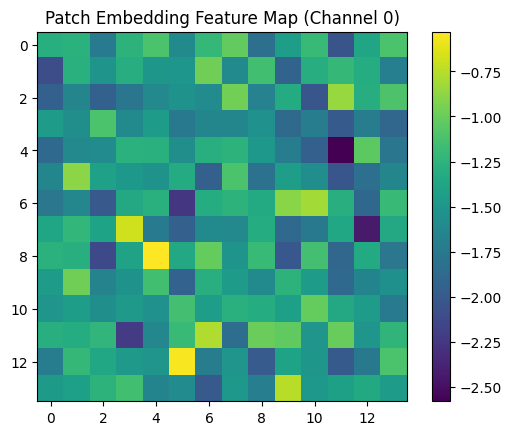

In [3]:
# Get patch embedding output
with torch.no_grad():
    patch_embed_output = model.patch_embed.proj(input_image)  # [1, 192, 14, 14]

# Visualize the first channel
feature_map = patch_embed_output[0, 0].cpu().numpy()
plt.imshow(feature_map, cmap='viridis')
plt.colorbar()
plt.title('Patch Embedding Feature Map (Channel 0)')
plt.show()

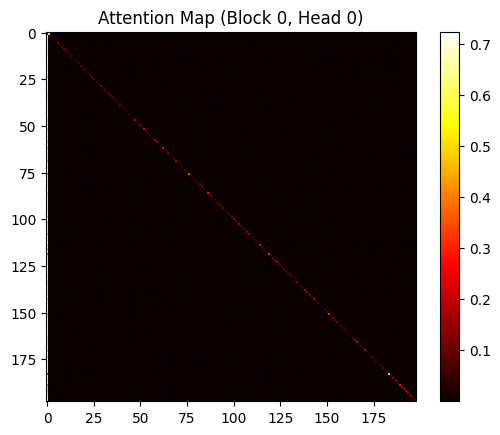

In [5]:
import torch
import torch.nn as nn
import timm
import matplotlib.pyplot as plt

# Загрузка модели
model = timm.create_model('deit_tiny_distilled_patch16_224', pretrained=True, num_classes=100)
model.eval()

# Класс для хранения весов внимания
class AttentionWithWeights(nn.Module):
    def __init__(self, attn_module):
        super().__init__()
        self.attn = attn_module
        self.last_attn = None
    
    def forward(self, x):
        # Исходные шаги Attention из timm.models.vision_transformer
        B, N, C = x.shape  # [batch_size, num_tokens, dim]
        qkv = self.attn.qkv(x).reshape(B, N, 3, self.attn.num_heads, C // self.attn.num_heads).permute(2, 0, 3, 1, 4)
        q, k, v = qkv[0], qkv[1], qkv[2]  # [batch_size, num_heads, num_tokens, head_dim]
        
        attn = (q @ k.transpose(-2, -1)) * self.attn.scale  # [batch_size, num_heads, num_tokens, num_tokens]
        attn = attn.softmax(dim=-1)  # Применяем softmax для получения весов внимания
        self.last_attn = attn  # Сохраняем веса внимания
        
        attn = self.attn.attn_drop(attn)
        x = (attn @ v).transpose(1, 2).reshape(B, N, C)
        x = self.attn.proj(x)
        x = self.attn.proj_drop(x)
        return x

# Применение обёртки к каждому блоку
for block in model.blocks:
    block.attn = AttentionWithWeights(block.attn)

# Создание случайного входного изображения
input_image = torch.randn(1, 3, 224, 224)

# Прямой проход
with torch.no_grad():
    output = model(input_image)

# Визуализация карты внимания из первого блока, первой головы
attn_map = model.blocks[0].attn.last_attn[0, 0].cpu().numpy()  # [198, 198]
plt.imshow(attn_map, cmap='hot', interpolation='nearest')
plt.colorbar()
plt.title('Attention Map (Block 0, Head 0)')
plt.show()

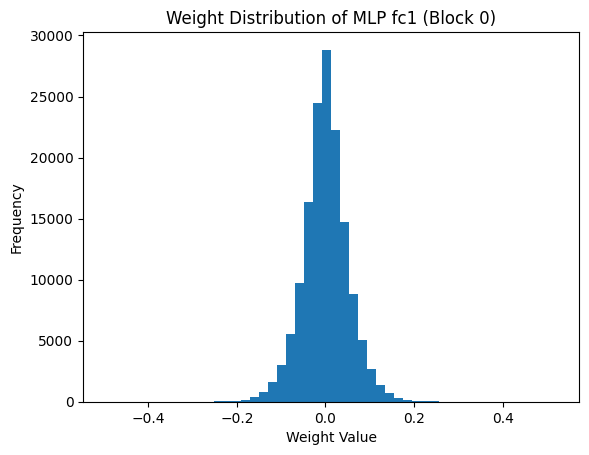

In [6]:
# Get weights from the first MLP's fc1 layer
weights = model.blocks[0].mlp.fc1.weight.detach().cpu().numpy().flatten()

# Plot histogram
plt.hist(weights, bins=50)
plt.title('Weight Distribution of MLP fc1 (Block 0)')
plt.xlabel('Weight Value')
plt.ylabel('Frequency')
plt.show()

In [8]:
import torch
import torch.nn as nn
import torchvision.models as models
from torchvision.models import regnet_y_16gf, RegNet_Y_16GF_Weights


teacher_model = models.regnet_y_16gf(weights=RegNet_Y_16GF_Weights.IMAGENET1K_V1)
in_features = teacher_model.fc.in_features  # 3024
teacher_model.fc = nn.Sequential(
    nn.Linear(in_features, 100),
    nn.Dropout(p=0.6),
    nn.Linear(100, 100)
)
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
teacher_model.to(device)
path1='/home/ir739wb/ilyarekun/nn_DeiT_25/teacher_regnety160_cifar100.pth'
checkpoint_path = "/home/ir739wb/ilyarekun/nn_DeiT_25/cifar100_imagenet_style/teacher_regnety160_cifar100.pth"
checkpoint = torch.load(path1, map_location=device)
new_state_dict = {key.replace("module.", ""): value for key, value in checkpoint.items()}
teacher_model.load_state_dict(new_state_dict)
for param in teacher_model.parameters():
    param.requires_grad = False
teacher_model.eval()

RegNet(
  (stem): SimpleStemIN(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
  )
  (trunk_output): Sequential(
    (block1): AnyStage(
      (block1-0): ResBottleneckBlock(
        (proj): Conv2dNormActivation(
          (0): Conv2d(32, 224, kernel_size=(1, 1), stride=(2, 2), bias=False)
          (1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        )
        (f): BottleneckTransform(
          (a): Conv2dNormActivation(
            (0): Conv2d(32, 224, kernel_size=(1, 1), stride=(1, 1), bias=False)
            (1): BatchNorm2d(224, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
            (2): ReLU(inplace=True)
          )
          (b): Conv2dNormActivation(
            (0): Conv2d(224, 224, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), groups=2, bias=False)
      

In [9]:
import torch
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt
import numpy as np

# Load CIFAR-100 dataset for a sample image
transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.5071, 0.4867, 0.4408], std=[0.2675, 0.2565, 0.2761])
])
dataset = torchvision.datasets.CIFAR100(root='./data', train=True, download=True, transform=transform)
sample_image, _ = dataset[0]
input_image = sample_image.unsqueeze(0).to(device)

100%|██████████| 169M/169M [00:07<00:00, 21.9MB/s] 


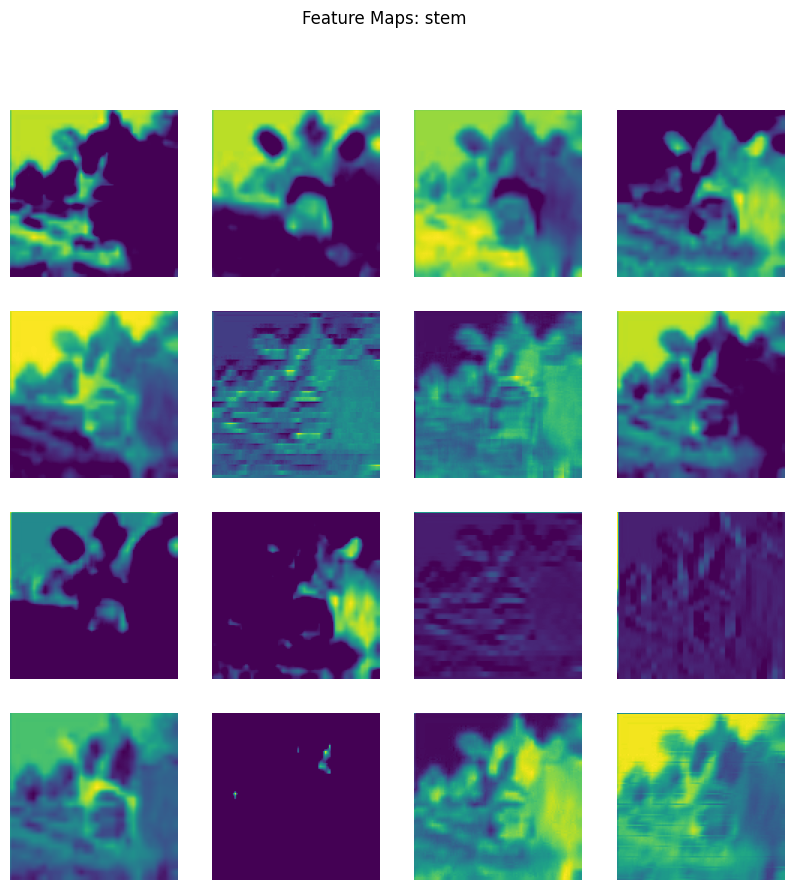

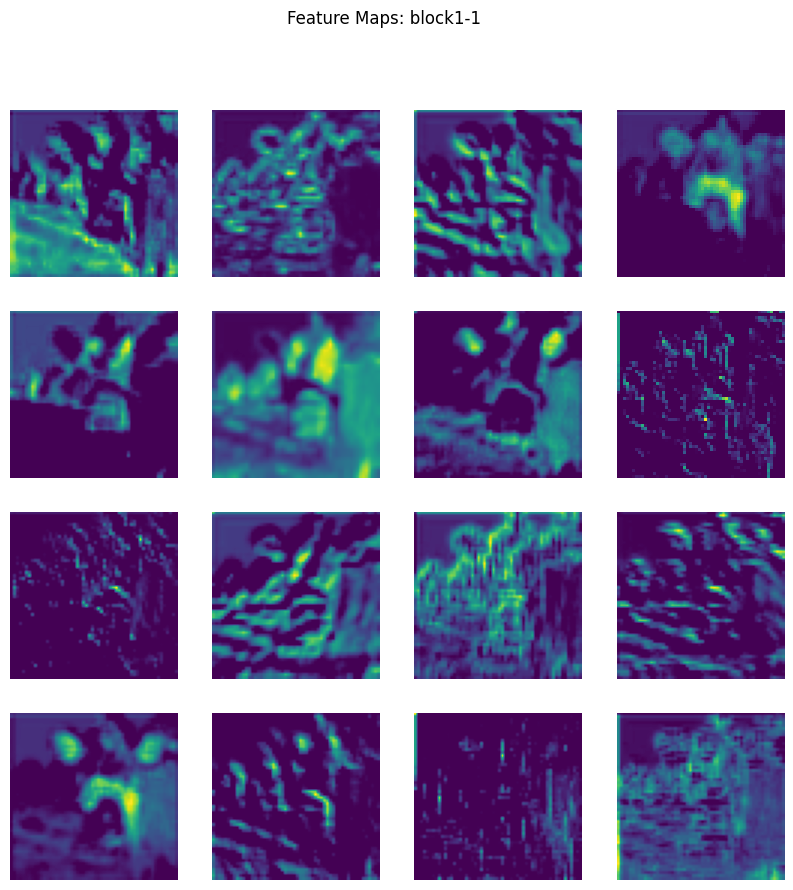

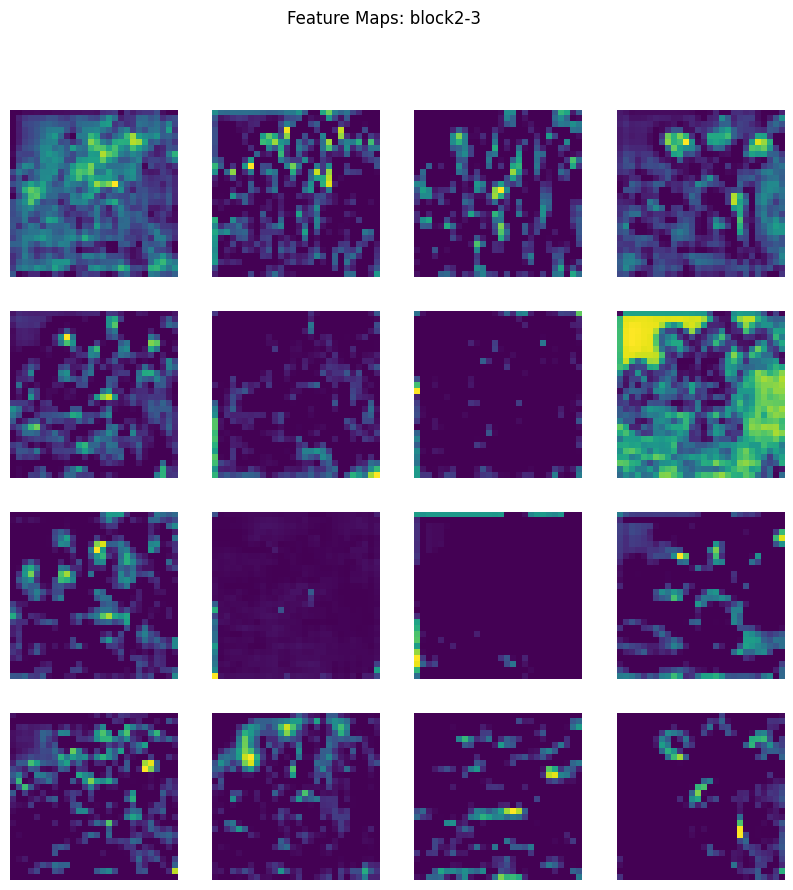

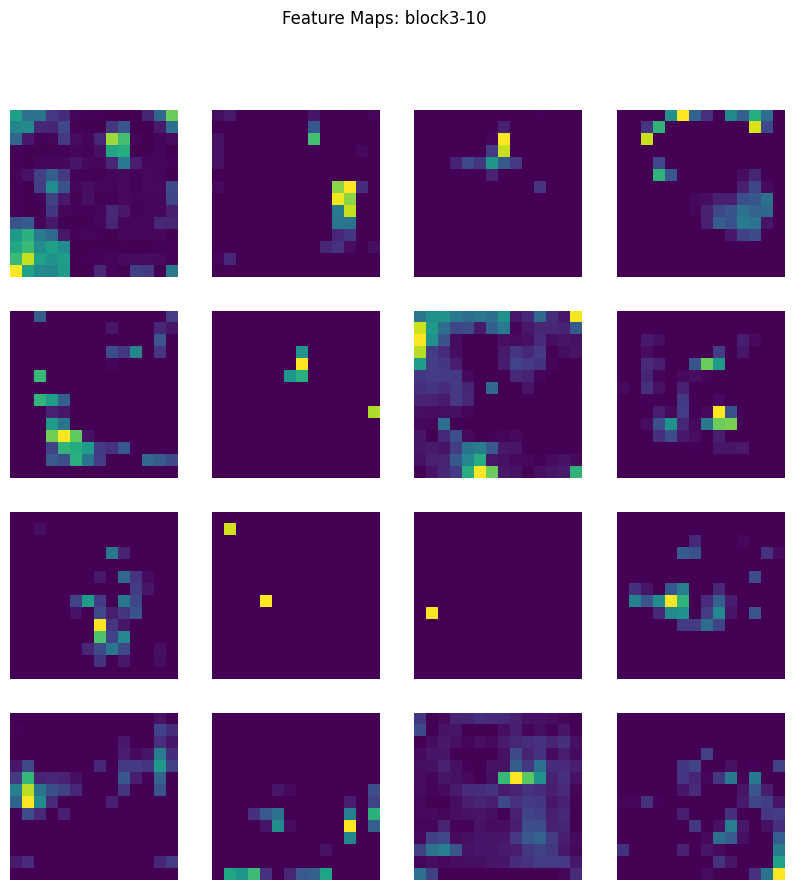

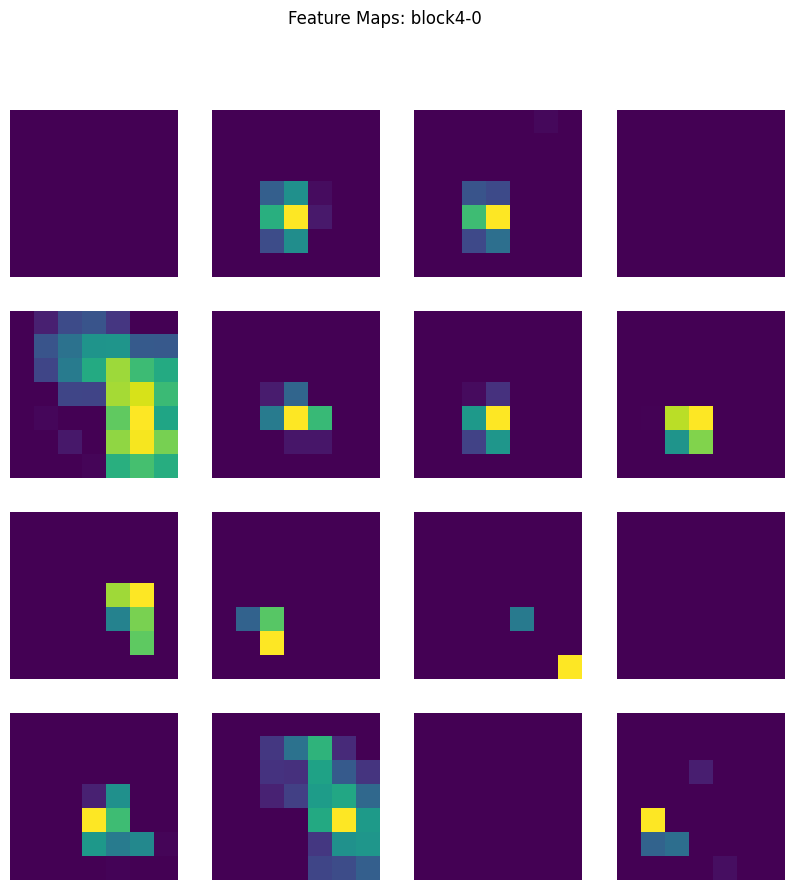

In [10]:
feature_maps = {}

def get_feature_map(name):
    def hook(module, input, output):
        feature_maps[name] = output.detach()
    return hook

# Register hooks
teacher_model.stem.register_forward_hook(get_feature_map('stem'))
teacher_model.trunk_output.block1[1].register_forward_hook(get_feature_map('block1-1'))
teacher_model.trunk_output.block2[3].register_forward_hook(get_feature_map('block2-3'))
teacher_model.trunk_output.block3[10].register_forward_hook(get_feature_map('block3-10'))
teacher_model.trunk_output.block4[0].register_forward_hook(get_feature_map('block4-0'))

# Forward pass
with torch.no_grad():
    teacher_model(input_image)

# Visualize feature maps
def plot_feature_maps(feature_map, name, num_channels=16):
    fmap = feature_map.squeeze(0).cpu().numpy()
    fig, axes = plt.subplots(4, 4, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        if i < num_channels and i < fmap.shape[0]:
            ax.imshow(fmap[i], cmap='viridis')
        ax.axis('off')
    plt.suptitle(f'Feature Maps: {name}')
    plt.show()

for name, fmap in feature_maps.items():
    plot_feature_maps(fmap, name)

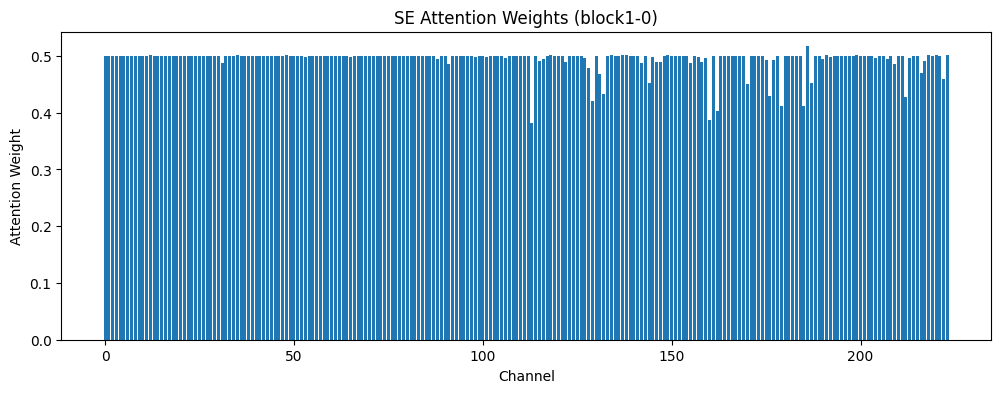

In [11]:
attention_weights = {}

def get_attention(name):
    def hook(module, input, output):
        attention_weights[name] = output.detach()
    return hook

# Register hook on SE block in block1-0
teacher_model.trunk_output.block1[0].f.se.scale_activation.register_forward_hook(get_attention('block1-0_se'))

# Forward pass
with torch.no_grad():
    teacher_model(input_image)

# Plot attention weights
attn = attention_weights['block1-0_se'].squeeze().cpu().numpy()
plt.figure(figsize=(12, 4))
plt.bar(range(len(attn)), attn)
plt.xlabel('Channel')
plt.ylabel('Attention Weight')
plt.title('SE Attention Weights (block1-0)')
plt.show()

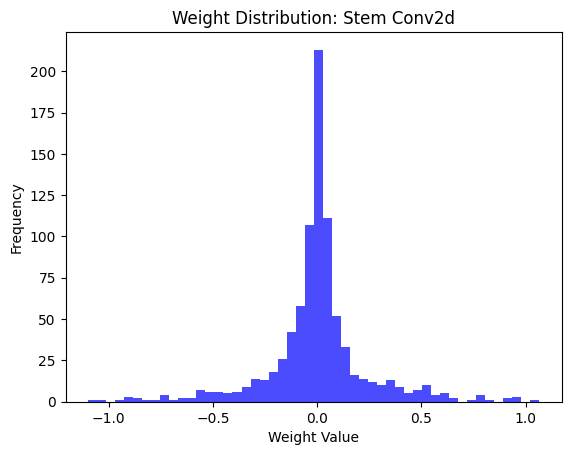

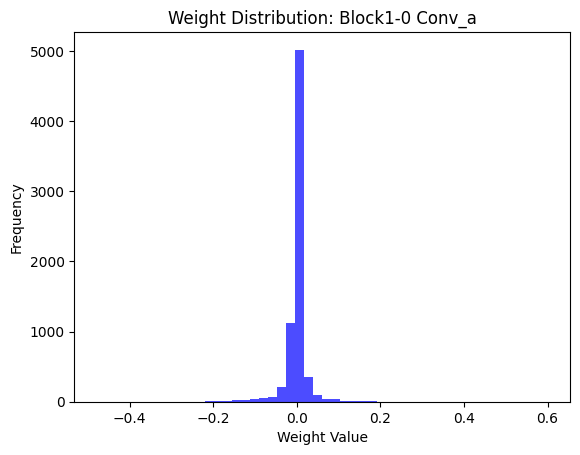

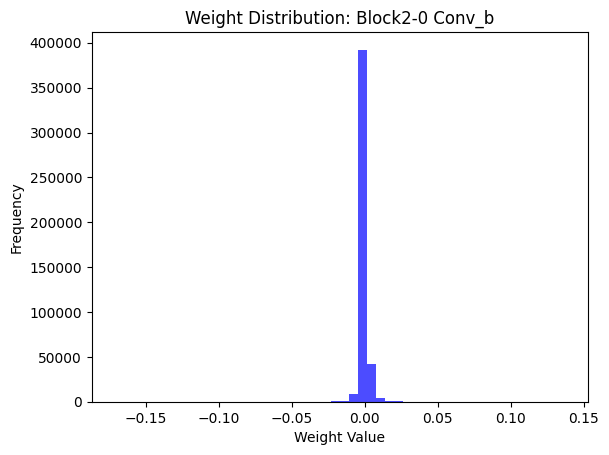

In [12]:
def plot_weight_distribution(layer, name):
    weights = layer.weight.data.cpu().numpy().flatten()
    plt.hist(weights, bins=50, color='blue', alpha=0.7)
    plt.title(f'Weight Distribution: {name}')
    plt.xlabel('Weight Value')
    plt.ylabel('Frequency')
    plt.show()

# Plot weights for selected convolutional layers
plot_weight_distribution(teacher_model.stem[0], 'Stem Conv2d')
plot_weight_distribution(teacher_model.trunk_output.block1[0].f.a[0], 'Block1-0 Conv_a')
plot_weight_distribution(teacher_model.trunk_output.block2[0].f.b[0], 'Block2-0 Conv_b')

In [3]:
!pwd

/home/ir739wb/ilyarekun/nn_DeiT_25


In [4]:
!which python

/home/ir739wb/miniconda3/envs/deitenv1/bin/python


In [2]:
!dot -V


/bin/bash: line 1: dot: command not found


In [5]:
%pip install graphviz
%conda install -c conda-forge graphviz
from graphviz import Digraph

dot = Digraph(comment='RegNetY-16GF', format='png')

# Nodes
dot.node('Input', 'Input Image\n[batch_size, 3, 224, 224]')
dot.node('Stem', 'Stem\nConv2d(3→32, k=3, s=2)\n→ BN → ReLU\n[batch_size, 32, 112, 112]')
dot.node('Block1', 'Block1\n2 ResBottleneckBlocks with SE\n32→224 channels, s=2\n[batch_size, 224, 56, 56]')
dot.node('Block2', 'Block2\n4 ResBottleneckBlocks with SE\n224→448 channels, s=2\n[batch_size, 448, 28, 28]')
dot.node('Block3', 'Block3\n11 ResBottleneckBlocks with SE\n448→1232 channels, s=2\n[batch_size, 1232, 14, 14]')
dot.node('Block4', 'Block4\n1 ResBottleneckBlock with SE\n1232→3024 channels, s=2\n[batch_size, 3024, 7, 7]')
dot.node('AvgPool', 'AdaptiveAvgPool2d\n[batch_size, 3024, 1, 1]')
dot.node('FC', 'FC Layers\nLinear(3024→100) → Dropout(0.6) → Linear(100→100)\n[batch_size, 100]')

# Edges
dot.edge('Input', 'Stem')
dot.edge('Stem', 'Block1')
dot.edge('Block1', 'Block2')
dot.edge('Block2', 'Block3')
dot.edge('Block3', 'Block4')
dot.edge('Block4', 'AvgPool')
dot.edge('AvgPool', 'FC')

# Render the diagram
dot.render('regnety_16gf_architecture', view=False)

Note: you may need to restart the kernel to use updated packages.
Channels:
 - conda-forge
 - defaults
Platform: linux-64
Solving environment: done


==> WARNING: A newer version of conda exists. <==
    current version: 25.1.1
    latest version: 25.3.0

Please update conda by running

    $ conda update -n base -c defaults conda



## Package Plan ##

  environment location: /home/ir739wb/miniconda3/envs/deitenv1

  added / updated specs:
    - graphviz


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    cairo-1.16.0               |    h6cf1ce9_1008         1.5 MB  conda-forge
    expat-2.4.8                |       h27087fc_0         187 KB  conda-forge
    fontconfig-2.14.0          |       h8e229c2_0         305 KB  conda-forge
    freetype-2.10.4            |       h0708190_1         890 KB  conda-forge
    graphite2-1.3.13           |    h58526e2_1001         102 KB  conda-forge
    

'regnety_16gf_architecture.png'